In [1]:
import pandas as pd

In [2]:
data =    pd.read_csv('BankNote_Authentication.csv')

In [3]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
data['class'].unique()

array([0, 1], dtype=int64)

In [6]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

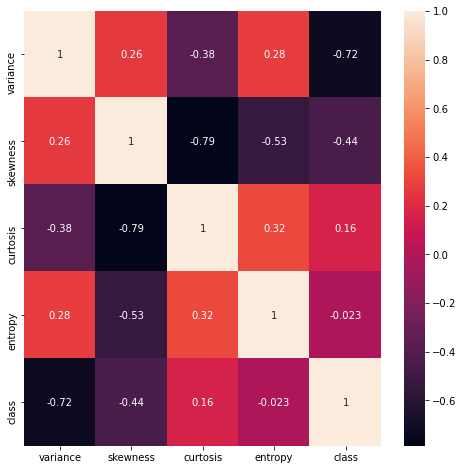

In [9]:
plt.figure(figsize = (8,8))
sn.heatmap(data.corr(),annot = True)


In [10]:
class_results  = data['class'].value_counts()

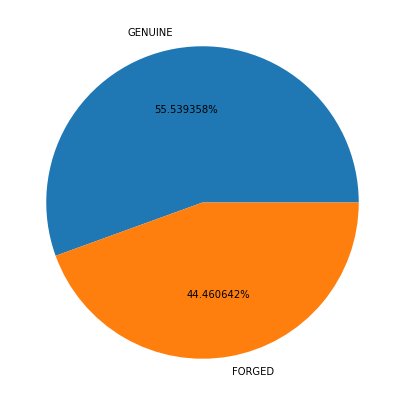

In [21]:
plt.figure(figsize = (7,8))
plt.pie(class_results,autopct= '%2f%%',labels = ['GENUINE','FORGED'])
plt.show()


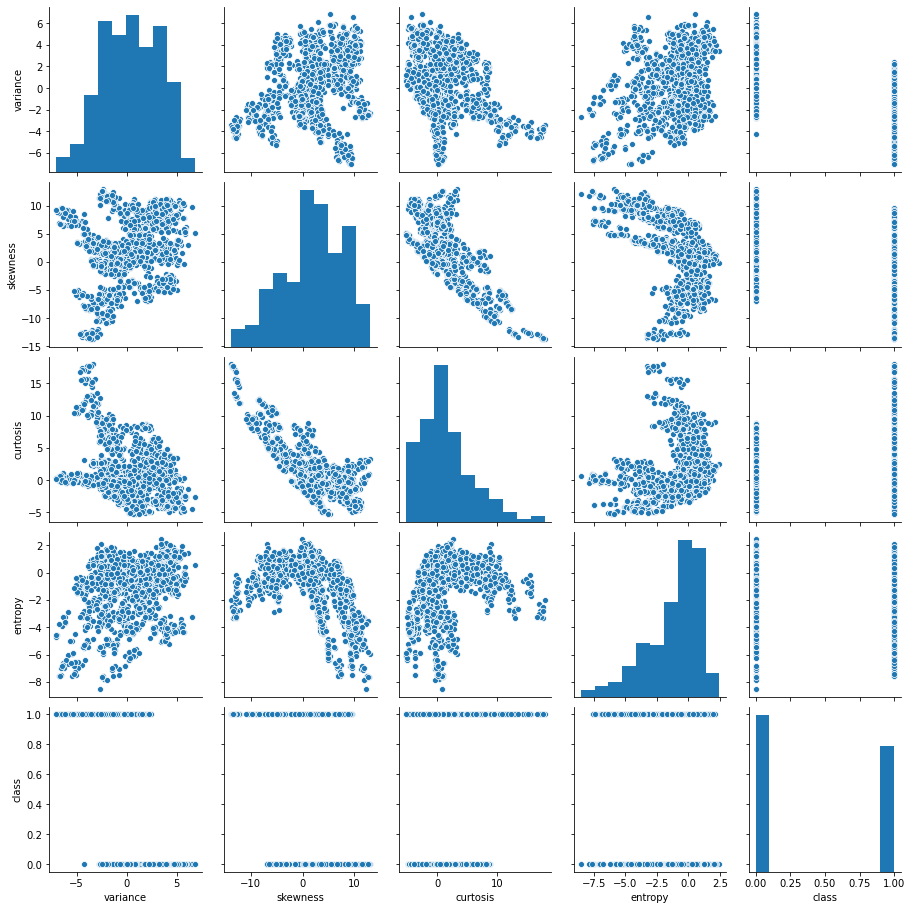

In [23]:
sn.pairplot(data)

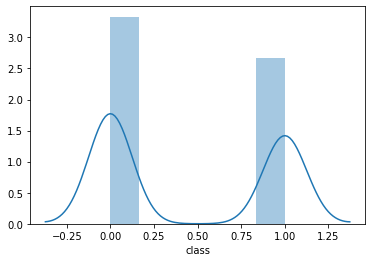

In [28]:
sn.distplot(data['class'])


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [35]:
data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
def preprocessing_inputs(df):
    df= df.copy()
    # split data into X,y
    y = df['class']
    X = df.drop(['class'],axis = 'columns')
    #  traine data
    X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2)
    return X_train,X_test,y_train,y_test

In [58]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [59]:
scaler.fit(X_train)

StandardScaler()

In [60]:
X_train = scaler.transform(X_train)

In [61]:
X_train 

array([[ 1.28146719, -0.96703639,  0.33513557,  0.56853497],
       [ 0.0641179 ,  0.30453502, -1.26644559, -0.37887388],
       [-0.97471886,  1.84112644,  0.34972972, -2.16837048],
       ...,
       [-1.64678941, -1.66846414,  2.3966626 , -0.33500697],
       [-1.61916569, -2.45892916,  3.11755367, -0.0949876 ],
       [-1.2615505 , -0.34473401, -0.1039204 ,  0.58072064]])

In [65]:
X_train = pd.DataFrame(scaler.transform(X_train),columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X.columns)

In [66]:
X_train

,variance,skewness,curtosis,entropy
0,-0.123330,-0.389450,-0.417446,1.006305
1,-0.178032,-0.383041,-0.436981,0.907199
2,-0.224712,-0.375296,-0.417268,0.720004
3,-0.226073,-0.392627,-0.406177,0.973545
4,-0.207166,-0.377316,-0.433832,0.716308
...,...,...,...,...
1092,-0.112336,-0.388489,-0.417578,1.064431
1093,-0.113480,-0.389325,-0.417487,1.018988
1094,-0.254911,-0.392985,-0.392300,0.911788
1095,-0.253670,-0.396969,-0.383507,0.936895


In [67]:
X_test

,variance,skewness,curtosis,entropy
0,0.182150,-0.318834,1.191725,0.308984
1,1.213599,-1.250162,0.552091,-0.031001
2,1.529796,1.485629,-1.383981,-1.422586
3,1.181496,0.417353,-0.199777,0.718416
4,1.220603,1.356488,-1.227981,-1.105152
...,...,...,...,...
270,1.071641,-1.058577,1.058190,0.645303
271,-0.369422,1.157102,0.095483,-1.480494
272,-1.529717,0.370529,-0.411019,-1.276379
273,1.132470,-0.197496,0.120528,1.472112


In [68]:
X_train.var()

variance    0.002021
skewness    0.000025
curtosis    0.000149
entropy     0.010953
dtype: float64

In [69]:
X_train.mean()

variance   -0.180913
skewness   -0.384575
curtosis   -0.421533
entropy     0.946832
dtype: float64

In [70]:
X_test.var()

variance    1.086561
skewness    1.061349
curtosis    0.920661
entropy     0.899892
dtype: float64

In [71]:
y_train

157     0
1291    1
516     0
1152    1
284     0
       ..
387     0
188     0
1309    1
826     1
1174    1
Name: class, Length: 1097, dtype: int64

In [55]:
y_test

1357    1
471     0
51      0
1107    1
1364    1
       ..
807     1
917     1
768     1
749     0
1032    1
Name: class, Length: 275, dtype: int64

In [73]:
from sklearn.linear_model import  LogisticRegression
rog = LogisticRegression()

In [74]:
rog.fit(X_train,y_train)

LogisticRegression()

In [75]:

rog.score(X_test,y_test)

0.8836363636363637

In [76]:
y_pred = rog.predict(X_test)

In [77]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [82]:
rog.score(X_test,y_test)

0.8836363636363637

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [81]:
cm

array([[159,  12],
       [ 20,  84]], dtype=int64)

In [86]:
import numpy as np

([<matplotlib.axis.YTick at 0x1bd66006250>,
 [Text(0, 0.5, 'GENUINE'), Text(0, 1.5, 'FORGED')])

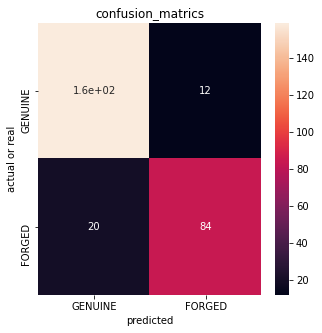

In [90]:
plt.figure(figsize = (5,5))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual or real')
plt.title('confusion_matrics')
plt.xticks(np.arange(2) + 0.5 , ['GENUINE','FORGED'])
plt.yticks(np.arange(2) + 0.5 , ['GENUINE','FORGED'])